In [6]:
# !pip install numpy
# !pip install cplex
# !pip install qiskit-optimization

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from PuboOnGraph import Graph,listLidar,listCovering

G = nx.Graph()

points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover

pointsL = listLidar
points3 = listCovering
G = Graph

#G.add_nodes_from(points1 + points2 + points3)

def showGraph(S):
    
    pos = {node: node for node in G.nodes()} 
    nx.draw(G, pos, with_labels=False, node_size=40)
    actE = []
    actN = []
    for node in S:
      for edge in G.edges(node):
        actE.append(edge)
      for node2 in G.neighbors(node):
        actN.append(node2)
    # Draw the graph
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=False,node_color = 'grey', node_size=40)
    nx.draw_networkx_nodes(G, pos, listLidar, node_color = 'purple', node_size= 40)
    nx.draw_networkx_nodes(G, pos, S, node_color='red', node_size=40)
    nx.draw_networkx_nodes(G, pos, actN, node_color='blue', node_size=40)
    nx.draw_networkx_nodes(G, pos, S, node_color='red', node_size=40)
    nx.draw_networkx_edges(G, pos, actE, edge_color='red', node_size=40)
    plt.show()

In [24]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx
import re

m = Model(name='BMW') 

x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL)
m.objective_sense = 'min'



y = {node:m.binary_var_list(G.degree(node), name='z_'+str(node)) for node in points3}
for node in points3:
    m.add_constraint(sum(y[node]) >= 1)


for node in points3:
    m.add_constraint(sum(y[node]) == sum(x[v] for v in G.neighbors(node)))
    
print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))



// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[46];
dvar bool z_(-8.091122377896358, 18.802052654187754)[1];
dvar bool z_(-8.380953415421857, 16.193573316458274)[1];
dvar bool z_(-8.670784452947352, 13.585093978728787)[2];
dvar bool z_(-7.908877622103643, 13.197947345812247)[3];
dvar bool z_(-9.499091597581433, 13.374637787532002)[2];
dvar bool z_(-9.777395730035536, 10.869900595445074)[3];
dvar bool z_(-8.96061549047285, 10.976614640999305)[2];
dvar bool z_(-8.187181754557745, 10.69321015372532)[4];
dvar bool z_(-10.05569986248964, 8.365163403358144)[3];
dvar bool z_(-9.25044652799835, 8.368135303269822)[2];
dvar bool z_(-8.465485887011848, 8.18847296163839)[4];
dvar bool z_(-10.334003994943743, 5.860426211271216)[3];
dvar bool z_(-9.540277565523848, 5.75965596554034)[2];
dvar bool z_(-8.743790019465951, 5.68373576955146)[4];
dvar bool z_(-10.612308127397846, 3.3556890191842865)[3];
dvar bool z_(-9.830108603049347, 3.151176627810

'c:\\Users\\CYTech Student\\workspace\\BMW.lp'

objective: 31
status: OPTIMAL_SOLUTION(2)
  "x_-9.681336353374148_18.978743095907507"=1
  "x_-9.971167390899646_16.370263758178027"=1
  "x_-10.550829465950642_11.15330508271906"=1
  "x_-10.84066050347614_8.544825744989577"=1
  "x_-11.710153616052633_0.719387731801131"=1
  "x_-11.999984653578132_-1.8890916059283533"=1
  "x_-6.318663646625852_13.021256904092493"=1
  "x_-7.153576043988162_5.5070453278317055"=1
  "x_-7.431880176442266_3.0023081357447765"=1
  "x_-7.196621296010219_17.83195153097031"=1
  "x_-2.227191181282363_15.538368401095916"=1
  "x_2.7422389334454937_13.24478527122152"=1
  "x_5.226953990809422_12.097993706284322"=1
  "x_-0.5806672476575185_10.372950873799414"=1
  "x_-12.28981569110363_-4.497570943657834"=1
  "x_-9.265052650584675_-3.8926183355540447"=1
  "x_-6.240289610065721_-3.287665727450255"=1
  "x_-3.2155265695467676_-2.682713119346466"=1
  "x_-1.351404527534703_1.7693268999301734"=1
  "x_-4.530794418215535_1.133448921794011"=1
  "x_2.2883309518266484_9.048797858652

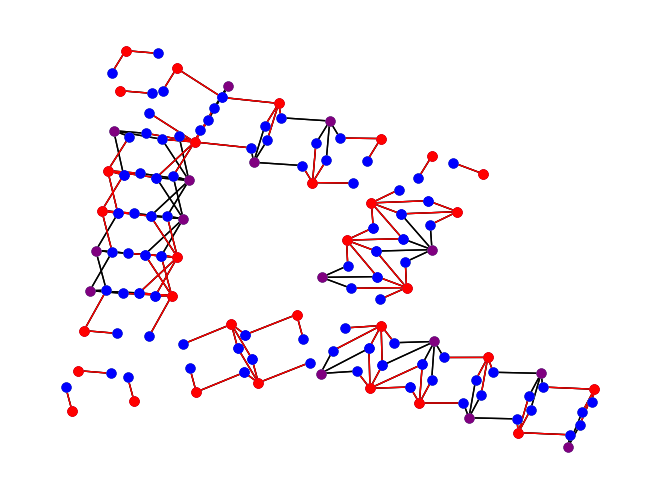

In [25]:
sol_model = m.solve()
m.print_solution()
S = []
for (x, y) in sol_model.iter_var_values():
    sx = str(x)
    if sx[0] == 'x':
        var =sx.split("_")
        S.append((float(var[1]), float(var[2])))
showGraph(S)

In [11]:
quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())

Problem name: BMW

Minimize
  x_0.25752387608156546_14.391576836158716
  + x_1.0750857920395311_6.6223075390786414
  + x_10.550035791267154_m2.065948393653061
  + x_11.84922161790519_m6.8937545700158775
  + x_13.146408571987681_m3.1044975059412714
  + x_2.2172335003587884_m3.040959322997317
  + x_2.2883309518266484_9.048797858652875
  + x_2.7422389334454937_13.24478527122152
  + x_2.7609174491055755_1.049698943211571
  + x_3.9986053488725193_3.525074742745459
  + x_4.625230529745389_m4.0041581347519575
  + x_5.226953990809422_12.097993706284322
  + x_5.2362932486394635_6.0004505422793475
  + x_5.357290229826102_0.011149830923360415
  + x_6.473981148406407_8.475826341813235
  + x_7.03322755913199_m4.967356946506598
  + x_7.711669048173352_10.951202141347125
  + x_7.953663010546629_m1.0273992813648503
  + x_9.44122458851859_m5.930555758261238
  + x_m0.13815936774758608_4.1958172195044074
  + x_m0.19076352902781235_m2.0777605112426767
  + x_m0.5806672476575185_10.372950873799414
  + x_m1.

In [15]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
import math
# qubo conversion
conv = QuadraticProgramToQubo()
qp = conv.convert(quadratic_program)

matrice = qp.objective.quadratic.coefficients.asformat("array")
diagonal = qp.objective.linear.coefficients.asformat("array")
# num = 0
# num1 = 0
for i in range (len(matrice)):
    # num1 = 0
    for j in range(len(matrice[i])):
        # num1 += 1
        if j == i:
            matrice[i][j] += diagonal[0][j]
    # num += 1
matrice2 = np.zeros((int(math.sqrt(len(matrice))+1)**2,int(math.sqrt(len(matrice))+1)**2))
matrice2[:len(matrice),:len(matrice)] = matrice
np.save("matrice_QUBO_JR.npy",matrice2)


print(qp.objective.linear.to_array())
print(qp.objective.linear.coefficients)
print(qp.objective.quadratic.to_array())
print(qp.objective.quadratic.coefficients)


# print(num, num1)
    # print("diagonal = ",diagonal[0][i])
# print(type(matrice))

# print(qp.objective.constant)
# print(qp.objective.quadratic)
# print(qp.binary_var_list(78)[0].as_tuple())
for n in qp.binary_var_dict(3).keys():
    print("n =", n)
for n in qp.integer_var_dict(3).items():
    print(n)
# print(qp.integer_var_dict)
print(qp.prettyprint())

# def extract_qubo_coefficients(qp: QuadraticProgram) -> np.ndarray:
#     num_variables = qp.get_num_vars()
#     qubo_matrix = np.zeros((num_variables, num_variables))

#     for i in range(num_variables):
#         # Coefficient of linear term
#         # qubo_matrix[i, i] = 
#         print("qp.get_variable(",i,")",qp.get_variable(i))
#         print("qp.get_variable(",i,")",qp.objective.linear)
#         # qp.get_linear_coefficient
#         # (qp.get_variable(i))

#         # Coefficients of quadratic terms
#         for j in range(i + 1, num_variables):
#             print("qp.get_variable(",i,")",qp.get_variable(i), "qp.get_variable(",j,")",qp.get_variable(j))
#             # qubo_matrix[i, j] = qp.objective.linear.coefficients(qp.get_variable(i), qp.get_variable(j))
#             # qubo_matrix[j, i] = qubo_matrix[i, j]  # QUBO matrix is symmetric
#     return qubo_matrix

# # Assuming you have a QuadraticProgram named 'quadratic_program'
# qubo_matrix = extract_qubo_coefficients(quadratic_program)
# print(qubo_matrix)
# print(qp.prettyprint())
# #Binary variables = 78

[ 1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00
  1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00 -3.1349e+05 -2.1150e+03
 -2.1150e+03 -2.3171e+05 -2.3171e+05 -2.3171e+05 -1.4100e+02 -1.4100e+02
  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04
  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04
  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04
  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04
  1.3630e+04  1.3630e+04  1.3630e+04  1.3630e+04  1

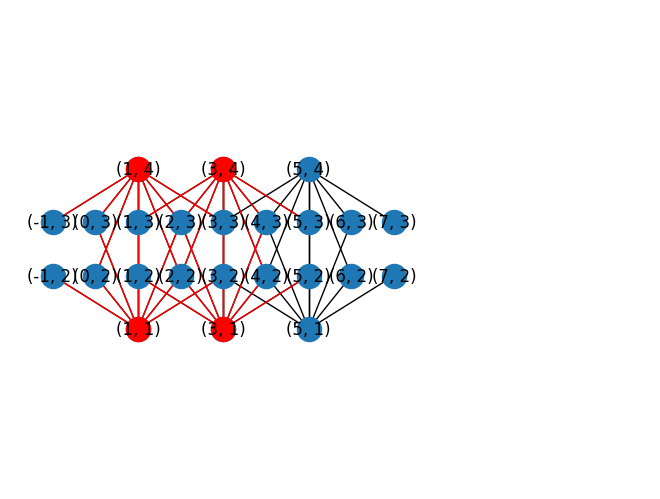

In [ ]:

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        G.add_edge(tuple(node2), (i,j))
actE =[]
for node in S:
  for edge in G.edges(node):
    actE.append(edge)
# Draw the graph
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True)

plt.xlim(-2, 13)
plt.ylim(-2, 7)

plt.xticks(range(1, 13))
plt.yticks(range(1, 7))
nx.draw_networkx_nodes(G, pos, S, node_color='red')
nx.draw_networkx_edges(G, pos, actE, edge_color='red')
plt.show()